<a href="https://colab.research.google.com/github/pamella-gonzales/FTW3-Day3/blob/master/Pam_IntroClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [0]:
data = pd.read_csv("Mall_Customers.csv")

In [0]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Exploratory Data Analysis

### How many rows/columns are there?

In [0]:
data.shape

(200, 5)

### How many customers are there?

In [0]:
data['CustomerID'].nunique()

200

This means, we have 200 unique customer IDs

### How many of each gender type are there?

In [0]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

This means, there are more female than male in our dataset.

### How does the annual income distribution of our customers look like?

Descriptive Statistics

In [0]:
data['Annual Income (k$)'].describe(np.arange(0.1, 1, 0.1))

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
10%       23.900000
20%       37.800000
30%       46.000000
40%       54.000000
50%       61.500000
60%       67.000000
70%       74.300000
80%       78.200000
90%       93.400000
max      137.000000
Name: Annual Income (k$), dtype: float64

The annual income ranges from 15 to 137 with an average (median) annual income is 61 k$.

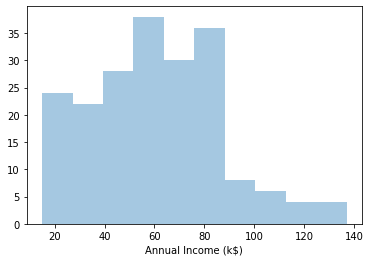

In [0]:
sns.distplot(data['Annual Income (k$)'], kde=False)

### How does the spending score distribution look like?

In [0]:
data['Spending Score (1-100)'].describe(np.arange(0.1, 1, 0.1))

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
10%       13.000000
20%       26.000000
30%       40.000000
40%       45.600000
50%       50.000000
60%       55.000000
70%       61.600000
80%       75.000000
90%       87.100000
max       99.000000
Name: Spending Score (1-100), dtype: float64

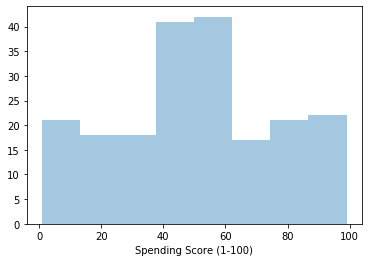

In [0]:
sns.distplot(data['Spending Score (1-100)'], kde=False)

Spend score is pretty much normally distributed. but since only 200 points, this not yet normal

# Clustering

In [0]:
from sklearn.cluster import KMeans

In [0]:
# Get features we need
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

# Convert categorical to numeric
# X = pd.get_dummies(X_raw)
# X_raw.head()

X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [0]:
!pip install hvplot

     |████████████████████████████████| 2.5MB 9.5MB/s 
     |████████████████████████████████| 1.6MB 28.1MB/s 
     |████████████████████████████████| 4.0MB 41.5MB/s 
     |████████████████████████████████| 71kB 9.1MB/s 


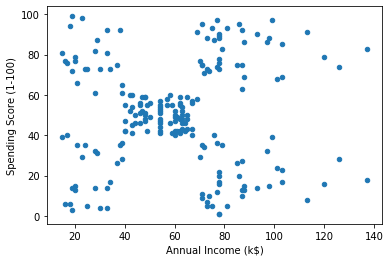

In [0]:
# If you have 2 features, you can plot it on a 2D scatter plot
X.plot.scatter('Annual Income (k$)', 'Spending Score (1-100)')

### Choosing Optimal *k*

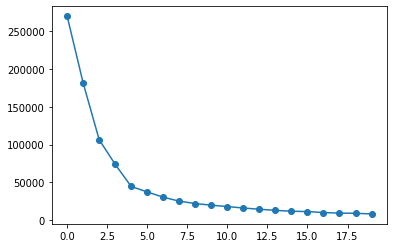

In [0]:
# get the sum of squared errors and find where the reduction of the errors are saturated with the increase of k
squared_errors = []

for num_iter in range(1,21):
  km = KMeans(n_clusters=num_iter, random_state=42)
  km.fit(X)
  squared_errors.append(km.inertia_)
#trying to iterate from 1 to 20
# comparing wcss
# check for the best k to use
plt.plot(squared_errors, marker = 'o')

Using the elbow method, I decided to use *k=5*. But i wanted to use 4, so changed k=4.

In [0]:
# Clustering using KMeans. We choose 5 clusters
km = KMeans(n_clusters=4, random_state=42)

# Fit all data to model; so all X
km.fit(X)

# Get labels
labels = km.predict(X)

# Create new dataframe with features and labels
new_data = X.copy()

# Add labels to new_data dataframe
new_data['labels'] = labels

In [0]:
new_data.head()

,Annual Income (k$),Spending Score (1-100),labels
0,15,39,0
1,15,81,3
2,16,6,0
3,16,77,3
4,17,40,0


### Plot Centers and labels

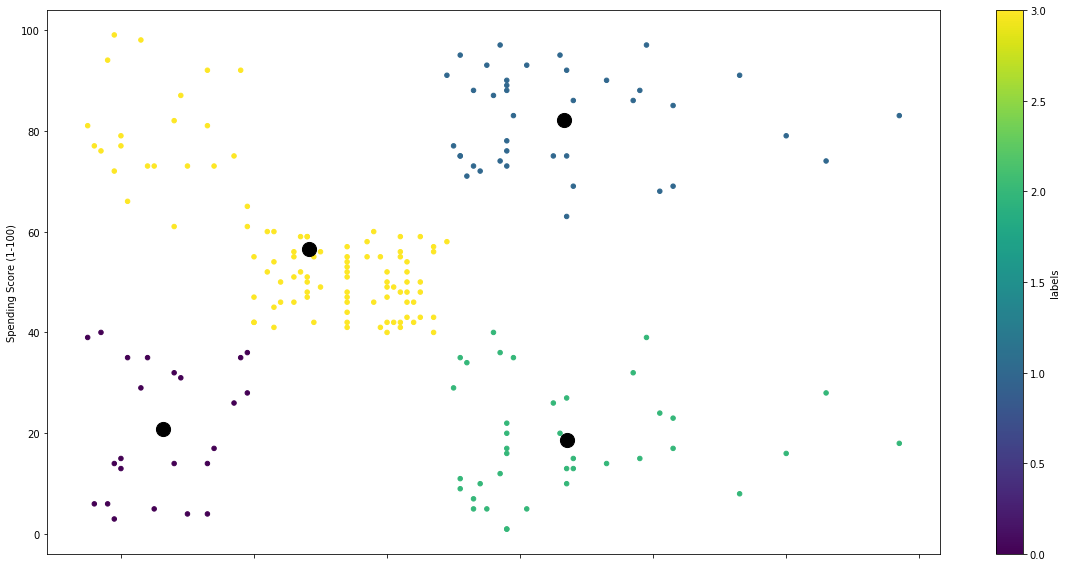

In [0]:
# Plot data points and colorize based on label
new_data.plot.scatter(x='Annual Income (k$)', 
                      y='Spending Score (1-100)', 
                      c='labels', 
                      cmap='viridis',
                      figsize=(20, 10))

# Get cluster centers
# x axis is income, y axis is spending score
centers = km.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], s=200, color='black')

# Deep Dive to each cluster

In [0]:
# Cluster 0
cluster_0 = new_data[new_data['labels']==0]
cluster_0.describe()

,Annual Income (k$),Spending Score (1-100),labels
count,23.000000,23.000000,23.0
mean,26.304348,20.913043,0.0
std,7.893811,13.017167,0.0
min,15.000000,3.000000,0.0
25%,19.500000,9.500000,0.0
50%,25.000000,17.000000,0.0
75%,33.000000,33.500000,0.0
max,39.000000,40.000000,0.0


Cluster 0: Average Spender (Medium Income and Spender)

In [0]:
# Cluster 1 
cluster_1 = new_data[new_data['labels']==1]
cluster_1.describe()

,Annual Income (k$),Spending Score (1-100),labels
count,35.000000,35.000000,35.0
mean,88.200000,17.114286,1.0
std,16.399067,9.952154,0.0
min,70.000000,1.000000,1.0
25%,77.500000,10.000000,1.0
50%,85.000000,16.000000,1.0
75%,97.500000,23.500000,1.0
max,137.000000,39.000000,1.0


Cluster 1: Stingy Person (High Income and Low Spend)

In [0]:
# Cluster 2
cluster_2 = new_data[new_data['labels']==2]
cluster_2.describe()

,Annual Income (k$),Spending Score (1-100),labels
count,23.000000,23.000000,23.0
mean,26.304348,20.913043,2.0
std,7.893811,13.017167,0.0
min,15.000000,3.000000,2.0
25%,19.500000,9.500000,2.0
50%,25.000000,17.000000,2.0
75%,33.000000,33.500000,2.0
max,39.000000,40.000000,2.0


Cluster 2: Living within means (Low Income, Low Spend)

In [0]:
# Cluster 3
cluster_3 = new_data[new_data['labels']==3]
cluster_3.describe()

,Annual Income (k$),Spending Score (1-100),labels
count,22.000000,22.000000,22.0
mean,25.727273,79.363636,3.0
std,7.566731,10.504174,0.0
min,15.000000,61.000000,3.0
25%,19.250000,73.000000,3.0
50%,24.500000,77.000000,3.0
75%,32.250000,85.750000,3.0
max,39.000000,99.000000,3.0


Cluster 3: Overspender (Low Income, High Spender)

In [0]:
# Cluster 4
cluster_4 = new_data[new_data['labels']==4]
cluster_4.describe()

,Annual Income (k$),Spending Score (1-100),labels
count,39.000000,39.000000,39.0
mean,86.538462,82.128205,4.0
std,16.312485,9.364489,0.0
min,69.000000,63.000000,4.0
25%,75.500000,74.500000,4.0
50%,79.000000,83.000000,4.0
75%,95.000000,90.000000,4.0
max,137.000000,97.000000,4.0


Cluster 4: Big Spender (High Income and Spending)

# Explore [Agglomerative Clustering](https://colab.research.google.com/drive/1IcjI_ac1gNipwTZv3WYYzeQNx-arqRl7)


# Homework: Perform Clustering on [Credit Card Dataset](https://drive.google.com/file/d/1EtH7Y4Y8zVcUWj9y3EnU1i7Vx2By2_LI/view?usp=sharing).